# 性格特性の分布を調査

In [6]:
import pickle 
import math

import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn 

%matplotlib inline
plt.rcParams['font.family'] = "Noto Serif CJK JP"

with open('../../data/Hazumi_features/Hazumi1911_features_bert_standard.pkl', mode='rb') as f:
    TS_ternary, third_sentiment,third_persona, plabel, text, audio, visual, vid = pickle.load(f, encoding='utf-8')

## 性格特性スコアの分布

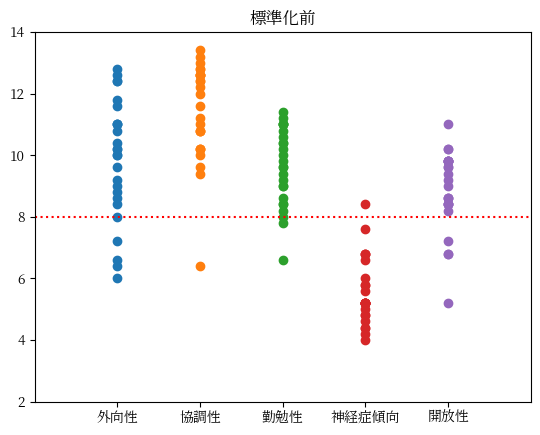

外向性 : high=22, low=4
協調性 : high=25, low=1
勤勉性 : high=24, low=2
神経症傾向 : high=1, low=25
開放性 : high=22, low=4


In [5]:
Traits_lable = ['外向性', '協調性', '勤勉性', '神経症傾向', '開放性']

def plot_boxplot(data):
    
    extraversion, agreeableness, conscientiousness, neuroticism, openness = data
    fig, ax = plt.subplots() 

    bp = ax.boxplot(data) 
    ax.set_xticklabels(Traits_lable)

    # plt.title('exam') 
    plt.ylim([2, 14])
    plt.grid() 

    plt.show()

    traits = [extraversion, agreeableness, conscientiousness, neuroticism, openness] 
    traits_name = Traits_lable

    for i, trait in enumerate(traits):
        low = 0 
        high = 0 
        for data in trait:
            if data >= 8.0:
                high += 1
            else:
                low += 1
        print(f"{traits_name[i]} : high={high}, low={low}") 

def plot_scatter(data, title = "", standardize=False):
    extraversion, agreeableness, conscientiousness, neuroticism, openness = data

    plt.scatter([1 for _ in range(26)], extraversion) 
    plt.scatter([2 for _ in range(26)], agreeableness)
    plt.scatter([3 for _ in range(26)], conscientiousness) 
    plt.scatter([4 for _ in range(26)], neuroticism) 
    plt.scatter([5 for _ in range(26)], openness)

    plt.xlim(0, 6) 
    if standardize:
        line = [0]
    else:
        plt.ylim(2, 14) 
        line = [8]

    plt.xticks([1, 2, 3, 4, 5], Traits_lable)
    plt.hlines(line, 0, 6, color='r', linestyles='dotted')

    plt.title(title)

    plt.show()

def plot_result(data, standardize=False):
    traits_name = Traits_lable

    for i, trait in enumerate(data):

        ssthresh = 0.0 if standardize else 8.0 
        low = 0 
        high = 0 
        for data in trait:
            if data >= ssthresh:
                high += 1
            else:
                low += 1
        print(f"{traits_name[i]} : high={high}, low={low}") 

def make_data(id, data, standardize=False):
    extraversion = [] 
    agreeableness = [] 
    conscientiousness = [] 
    neuroticism = [] 
    openness = [] 

    if standardize:
        data = pd.DataFrame.from_dict(data, orient="index")
        sc = StandardScaler()
        data = sc.fit_transform(data)
        data = pd.DataFrame(data, index=vid)
        data = data.to_dict(orient='index')

    for id in vid: 
        extraversion.append(data[id][0]) 
        agreeableness.append(data[id][1])
        conscientiousness.append(data[id][2])
        neuroticism.append(data[id][3]) 
        openness.append(data[id][4]) 

    return (extraversion, agreeableness, conscientiousness, neuroticism, openness)

data = make_data(vid, third_persona)

# plot_boxplot(data)
plot_scatter(data, title="標準化前")
plot_result(data)

# data_sc = make_data(vid, third_persona,standardize=True) 

# plot_scatter(data_sc, title="標準化後", standardize=True) 
# plot_result(data_sc, standardize=True)

In [5]:
from copy import deepcopy 

Traits_lable = ['外向性', '協調性', '勤勉性', '神経症傾向', '開放性']

def check(result):
    res = deepcopy(result)
    for i, data in enumerate(result):
        for j, d in enumerate(data):
            res[i][j] = round(d / sum(data), 2)
    print(res)

def solve(id, persona, sentiment):
    for i, trait_lable in enumerate(Traits_lable):
        count = [[0, 0, 0], [0, 0, 0]]
        print(f'============={trait_lable}=================')
        for j in id:
            for k in sentiment[j]:
                count[persona[j][i]][k] += 1
        check(count)


solve(vid, plabel, TS_ternary)

=============外向性=================
[[0.09, 0.37, 0.54], [0.06, 0.35, 0.59]]
=============協調性=================
[[0.1, 0.37, 0.53], [0.05, 0.35, 0.6]]
=============勤勉性=================
[[0.09, 0.37, 0.54], [0.05, 0.36, 0.59]]
=============神経症傾向=================
[[0.06, 0.36, 0.57], [0.09, 0.36, 0.55]]
=============開放性=================
[[0.1, 0.37, 0.53], [0.05, 0.35, 0.6]]


In [41]:
import torch

seq_len = 10
x = torch.rand(2, seq_len, 3)
print(x)
window_size = 3
step_size = 2
data = [x[:, i: i+window_size, :] for i in range(0, seq_len-window_size+1, step_size)]
data

tensor([[[0.2285, 0.9827, 0.2028],
         [0.4934, 0.3416, 0.8982],
         [0.3848, 0.8970, 0.5125],
         [0.5600, 0.5711, 0.0519],
         [0.4636, 0.5599, 0.5999],
         [0.3068, 0.6195, 0.4411],
         [0.4742, 0.3407, 0.7919],
         [0.2937, 0.6990, 0.9969],
         [0.8683, 0.1786, 0.9162],
         [0.8266, 0.2749, 0.5387]],

        [[0.4772, 0.0154, 0.0806],
         [0.0958, 0.4832, 0.6855],
         [0.3666, 0.6472, 0.6926],
         [0.1039, 0.7060, 0.8057],
         [0.0966, 0.0406, 0.3215],
         [0.5260, 0.0788, 0.5278],
         [0.7844, 0.4752, 0.6088],
         [0.4352, 0.4818, 0.3544],
         [0.4875, 0.4541, 0.0700],
         [0.2424, 0.0781, 0.3550]]])


[tensor([[[0.2285, 0.9827, 0.2028],
          [0.4934, 0.3416, 0.8982],
          [0.3848, 0.8970, 0.5125]],
 
         [[0.4772, 0.0154, 0.0806],
          [0.0958, 0.4832, 0.6855],
          [0.3666, 0.6472, 0.6926]]]),
 tensor([[[0.3848, 0.8970, 0.5125],
          [0.5600, 0.5711, 0.0519],
          [0.4636, 0.5599, 0.5999]],
 
         [[0.3666, 0.6472, 0.6926],
          [0.1039, 0.7060, 0.8057],
          [0.0966, 0.0406, 0.3215]]]),
 tensor([[[0.4636, 0.5599, 0.5999],
          [0.3068, 0.6195, 0.4411],
          [0.4742, 0.3407, 0.7919]],
 
         [[0.0966, 0.0406, 0.3215],
          [0.5260, 0.0788, 0.5278],
          [0.7844, 0.4752, 0.6088]]]),
 tensor([[[0.4742, 0.3407, 0.7919],
          [0.2937, 0.6990, 0.9969],
          [0.8683, 0.1786, 0.9162]],
 
         [[0.7844, 0.4752, 0.6088],
          [0.4352, 0.4818, 0.3544],
          [0.4875, 0.4541, 0.0700]]])]